**<h1> OpenCV Library</h1>**

## Objetivos

- Las tareas de procesamiento de imágenes y visión por computadora incluyen visualización, recorte, volteo, rotación, segmentación de imágenes, clasificación, restauración de imágenes, reconocimiento de imágenes y generación de imágenes. Además, trabajar con imágenes a través de la nube requiere almacenar, transmitir y recopilar imágenes a través de Internet. Python es una excelente opción ya que tiene muchas herramientas de procesamiento de imágenes, visión por computadora y bibliotecas de inteligencia artificial. Finalmente, tiene muchas bibliotecas para trabajar con archivos en la nube e Internet. Una imagen digital es simplemente un archivo en su computadora. En este laboratorio, comprenderá estos archivos y aprenderá a trabajar con estos archivos con algunas bibliotecas populares.

<ul>
    <li>Open CV 
        <ul>
            <li>Archivos de imagenes y Rutas (path)  </li>
            <li>cargar imagenes en Python</li>
            <li>Trazando una imagen </li>
            <li>Imagenes en escala de grises, Cuantificación y canales de colores  </li>
            
        </ul>
    </li>

</ul>

---
---

### Descargando las imagenes que usaremos en este tutorial:

In [1]:
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png 

--15:07:22--  http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
           => `lenna.png'
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud:80... connected!
HTTP request sent, awaiting response... 200 OK
Length: 473,831 [image/png]

    0K .......... .......... .......... .......... .......... 10% @ 187.97 KB/s
   50K .......... .......... .......... .......... .......... 21% @ 359.71 KB/s
  100K .......... .......... .......... .......... .......... 32% @ 387.60 KB/s
  150K .......... .......... .......... .......... .......... 43% @ 526.32 KB/s
  200K .......... .......... .......... .......... .......... 54% @ 666.67 KB/s
  250K .......... .......... .......... .......... .......... 64% @ 406.50 KB/s
  300K .......... .......... .......... .......... .......... 75% @ 714.29 KB/s
  350K .......... .......... .......... .......... .......... 86% @   1.25 MB/s
  400

- Primero, definamos una función auxiliar para concatenar dos imágenes una al lado de la otra. Deberá comprender este código en este momento, pero esta función se utilizará repetidamente en este tutorial para mostrar los resultados.

In [2]:
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

## Archivos de imagenes y rutas

- Una imagen se almacena como un archivo en su computadora. A continuación, definimos `my_image` como el nombre de archivo de un archivo en este directorio.

In [3]:
my_image = "lenna.png"

- El nombre del archivo consta de dos partes, el nombre del archivo y la extensión, separados por un punto `(.)`. La extensión especifica el formato de la imagen. Hay dos formatos de imagen populares: Joint Photographic Expert Group Imagen(o `.jpg`, `.jpeg`) y Portable Network Graphics (o `.png`). Estos tipos de archivos facilitan el trabajo con imágenes. Por ejemplo, comprime la imagen usando aproximaciones de seno / coseno, ocupando menos espacios en su disco para almacenar la imagen.

- Los archivos de imagen se almacenan en el sistema de archivos de su computadora. Su ubicación se especifica mediante una "ruta"o "path", que a menudo es única. Puede encontrar la ruta de su directorio de trabajo actual con el módulo `os` de Python. El módulo `os` proporciona funciones para interactuar con el sistema de archivos, p. Ej. crear o eliminar un directorio (carpeta), enumerar su contenido, cambiar e identificar el directorio de trabajo actual.

In [4]:
import os
cwd = os.getcwd()
cwd

'E:\\REPOS\\3.1-ImageProcessing-with-OpenCV'

- La "ruta" o "path" a una imagen se puede encontrar usando la siguiente línea de código.

In [5]:
image_path = os.path.join(cwd, my_image)
image_path

'E:\\REPOS\\3.1-ImageProcessing-with-OpenCV\\lenna.png'

## Cargar una imagen en Python

- OpenCV es una biblioteca utilizada para visión por computadora. Tiene más funcionalidad que la biblioteca `PIL` pero es más difícil de usar. Podemos importar `OpenCV` de la siguiente manera:

In [7]:
#!pip3 install opencv-contrib-python

In [8]:
import cv2

- El método `imread ()` carga una imagen del archivo especificado, la entrada es la ruta `path` de la imagen que se leerá (como PIL), el parámetro `flag` especifica cómo se debe leer la imagen y el valor predeterminado es `cv2.IMREAD_COLOR`.

In [9]:
image = cv2.imread(my_image)

- El resultado es una numpy array con valores de intensidad como enteros sin signo de 8 bits.

In [10]:
type(image)

numpy.ndarray

- Podemos obtener la forma de la matriz a partir del atributo `shape`.

In [11]:
image.shape

(512, 512, 3)

- La forma es la misma que la matriz PIL, pero hay varias diferencias; por ejemplo, PIL devuelve en formato (R, G, B) mientras que OpenCV devuelve en formato (B, G, R).

- Cada píxel podría tomar 256 valores posibles como intensidad, que van de 0 a 255, siendo 0 la intensidad más baja y 255 la más alta. Los valores de intensidad máxima y mínima de una imagen se pueden obtener, respectivamente, llamando a:

In [12]:
image.max()

255

y

In [13]:
image.min()

3

## Trazando una Imagen

- Puede usar la función `imshow` de OpenCV para abrir la imagen en una nueva ventana, pero esto puede causarle algunos problemas en Jupyter:

In [14]:
#cv2.imshow('image', imgage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

- También puede usar la función `imshow` desde la biblioteca `matplotlib`:

In [15]:
import matplotlib.pyplot as plt

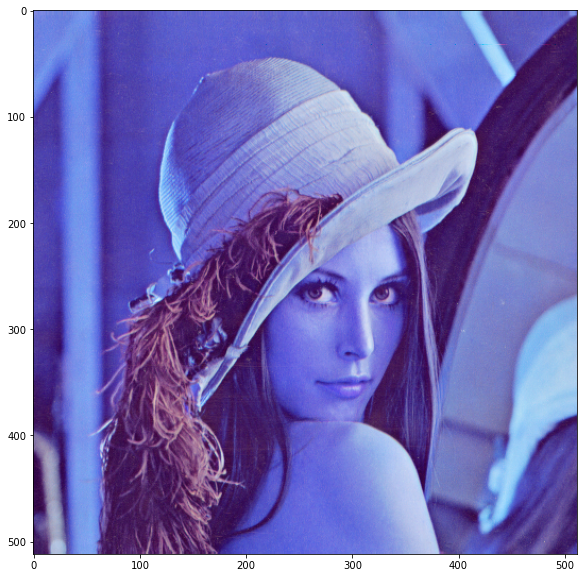

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

- La salida de la imagen no parece natural. Esto se debe a que el orden de los canales RGB es diferente. 

- Podemos cambiar el espacio de color con el código de conversión y la función `cvtColor` de la biblioteca `cv2`:

In [17]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

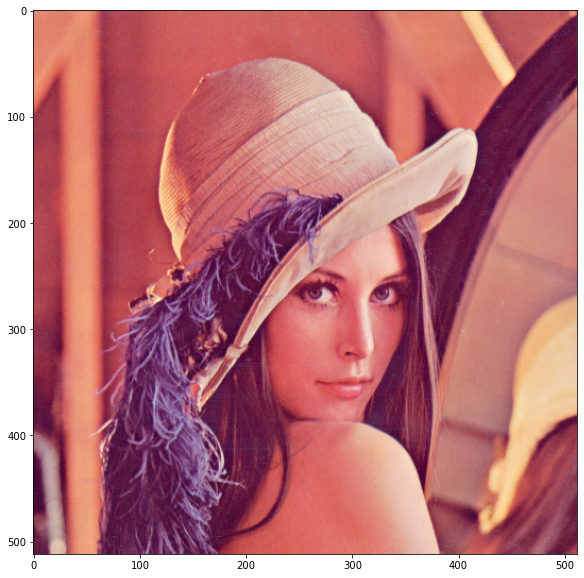

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(new_image)
plt.show()

- También puede cargar la imagen usando su ruta, esto es útil si la imagen no está en su directorio de trabajo:

In [19]:
image = cv2.imread(image_path)
image.shape

(512, 512, 3)

- Puede guardar la imagen como un formato `jpg`

In [20]:
cv2.imwrite("lenna.jpg", image)

True

## Imagenes en escala de grises 

- Las imágenes en escala de grises tienen valores de píxeles que representan la cantidad de luz o intensidad. Los tonos claros de gris tienen una intensidad alta, los tonos más oscuros tienen una intensidad más baja. El blanco tiene la intensidad más alta y el negro la más baja. Podemos convertir una imagen a escala de grises usando un código de conversión de color y la función `cvtColor`.

El código para RGB a gris es **`cv2.COLOR_BGR2GRAY`**, aplicamos la función:

In [21]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

- La matriz de imagenes tiene solo dos dimensiones, es decir, solo un canal de color:

In [22]:
image_gray.shape

(512, 512)

- Podemos trazar la imagen usando `imshow` pero tenemos que especificar que el mapa de color es gris:

plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray')
plt.show()

- Podemos guardar la imagen como una imagen en escala de grises, guardémosla también como `jpg`, en el directorio de trabajo.

In [24]:
cv2.imwrite('lenna_gray_cv.jpg', image_gray)

True

- También puede cargar una imagen en escala de grises, para esto tenemos que establecer el parámetro `flag` en el código de conversación de color gris: `cv2.COLOR_BGR2GRAY`:

In [25]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

- Podemos trazar la imagen:

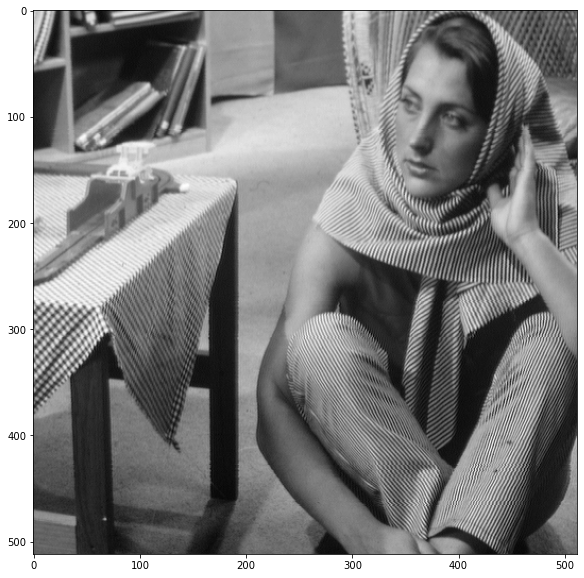

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(im_gray,cmap='gray')
plt.show()

### Canales de Colores

- Tambien podemos trabajar con diferentes canales de colores. Considere la siguiente imagen:

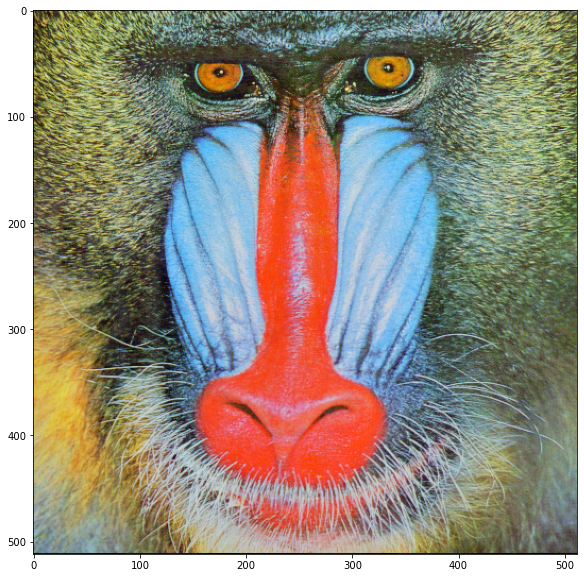

In [28]:
baboon=cv2.imread('baboon.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

- Podemos obtener los diferentes colores RGB y asignarlos a las variables `blue`, `green` y `red`, en formato (B, G, R).

In [29]:
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

- Podemos concatenar cada canal de las imagenes usando la funcion `vconcat`

In [30]:
im_bgr = cv2.vconcat([blue, green, red])

- Al trazar la imagen en color junto al canal rojo en escala de grises, vemos que las regiones con rojo tienen valores de intensidad más altos.

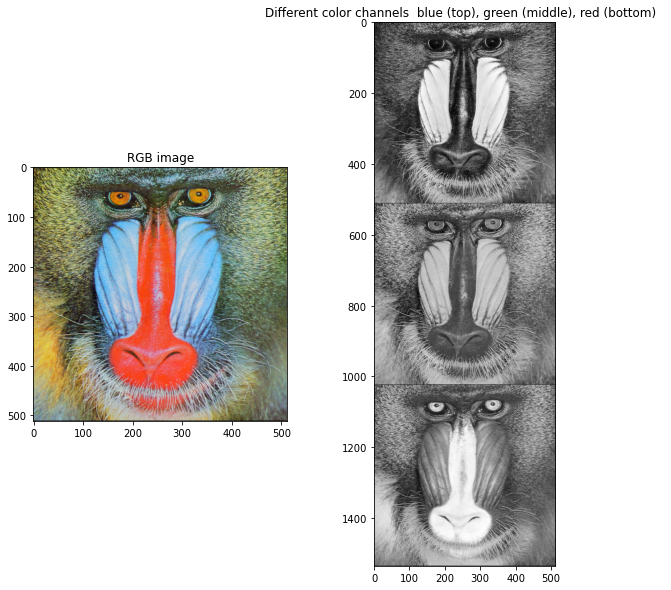

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")
plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

### Indexacion

- Podemos usar numpy slicing. Por ejemplo, podemos devolver las primeras 256 filas correspondientes a la mitad superior de la imagen:

In [32]:
rows = 256

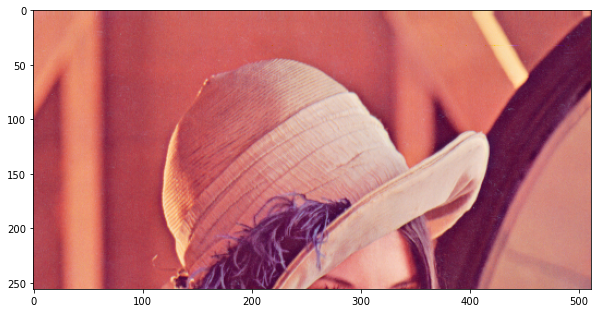

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(new_image[0:rows,:,:])
plt.show()

- También podemos devolver las primeras 256 columnas correspondientes a la primera mitad de la imagen:

In [34]:
columns = 256

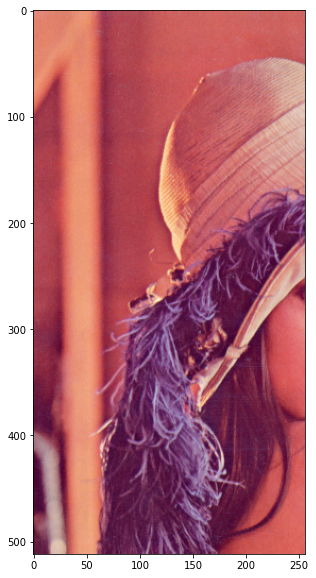

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(new_image[:,0:columns,:])
plt.show()

- Si desea reasignar una matriz a otra variable, debe usar el método `copy` (cubriremos esto en la siguiente sección).

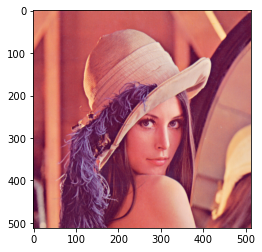

In [36]:
A = new_image.copy()
plt.imshow(A)
plt.show()

- Si no aplicamos el método `copy()`, la variable apuntará a la misma ubicación en la memoria. Considere la variable `B` a continuación, si establecemos todos los valores de la matriz `A` en cero, ya que `A` y `B` apuntan al mismo objeto en la memoria, `B` también tendrá elementos todos cero:

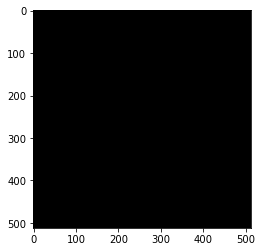

In [37]:
B = A
A[:,:,:] = 0
plt.imshow(B)
plt.show()

- También podemos manipular elementos usando indexación. En el siguiente fragmento de código, creamos una nueva matriz `baboon_red` y establecemos todos los canales de color rojo, excepto los de color rojo, en cero. Por tanto, cuando mostramos la imagen, aparece en rojo:

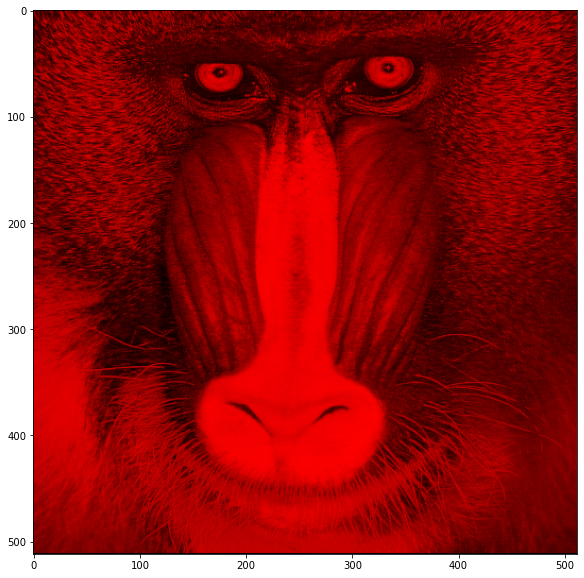

In [38]:
baboon_red = baboon.copy()
baboon_red[:, :, 0] = 0
baboon_red[:, :, 1] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))
plt.show()

- Podemos hacer los mismo para blue:

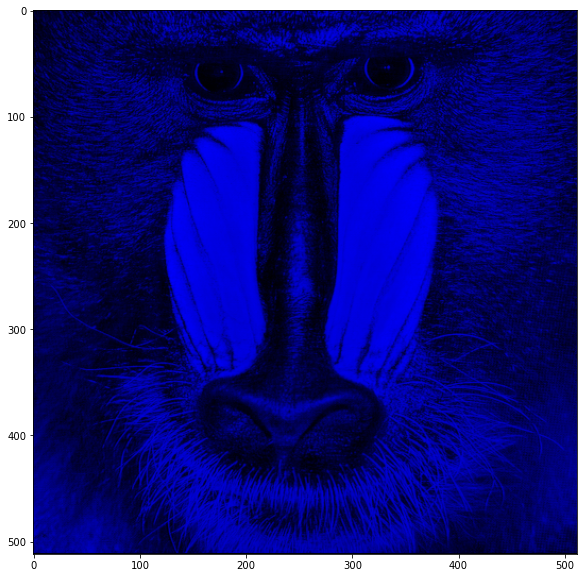

In [39]:
baboon_blue = baboon.copy()
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

- POdemos hacer lo mismo par Green

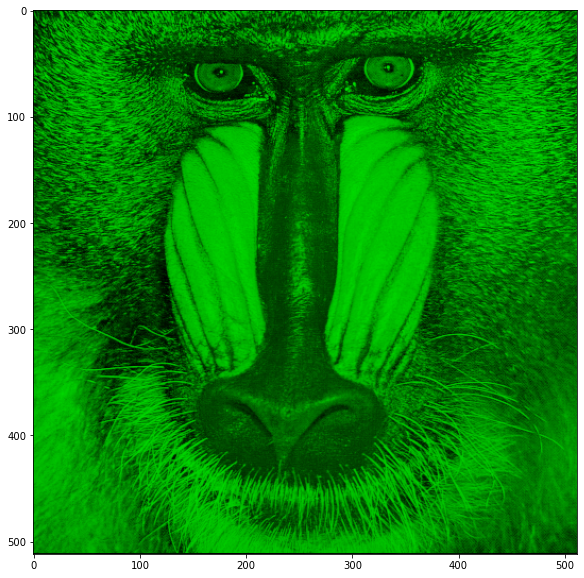

In [40]:
baboon_green = baboon.copy()
baboon_green[:, :, 0] = 0
baboon_green[:, :, 2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
image=cv2.imread('baboon.png')

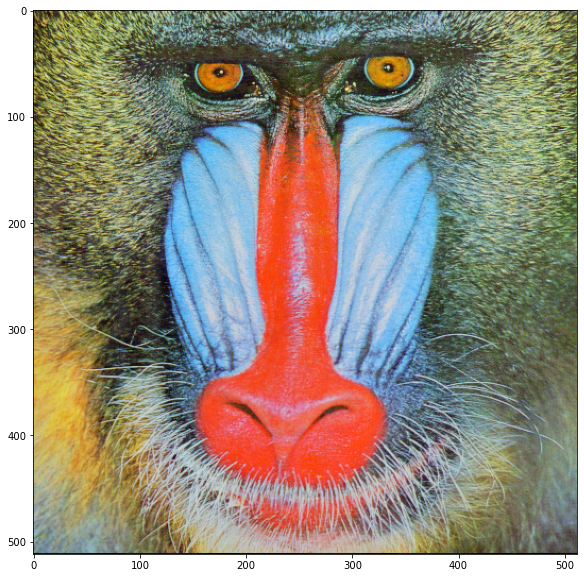

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

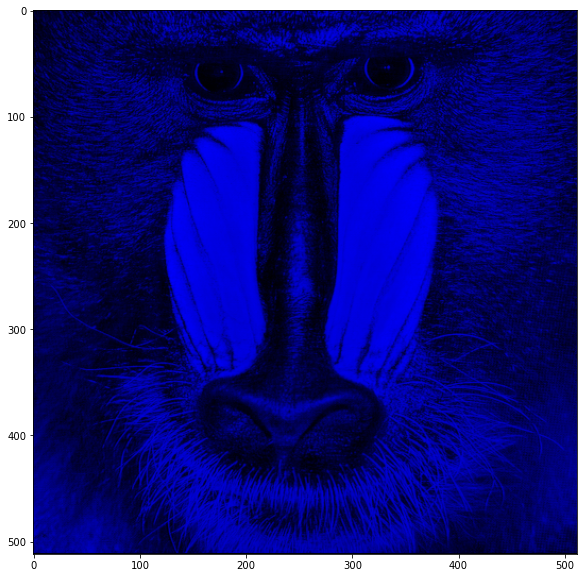

In [43]:
image=cv2.imread('baboon.png') # replace and add you image here name 
baboon_blue=image.copy()
baboon_blue[:,:,1] = 0
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()